Generated graph with 10 nodes and 23 edges


Is directed acyclic graph: True


Is connected graph: True


Number of nodes: 10


Number of edges: 23


Contamination sources: [3, 0]


Contamination emission time patterns:


Node 3 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node 0 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\A\AppData\Local\Temp\ipykernel_5948\3840692192.py:63: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sources = random.sample(G.nodes(), num_sources)


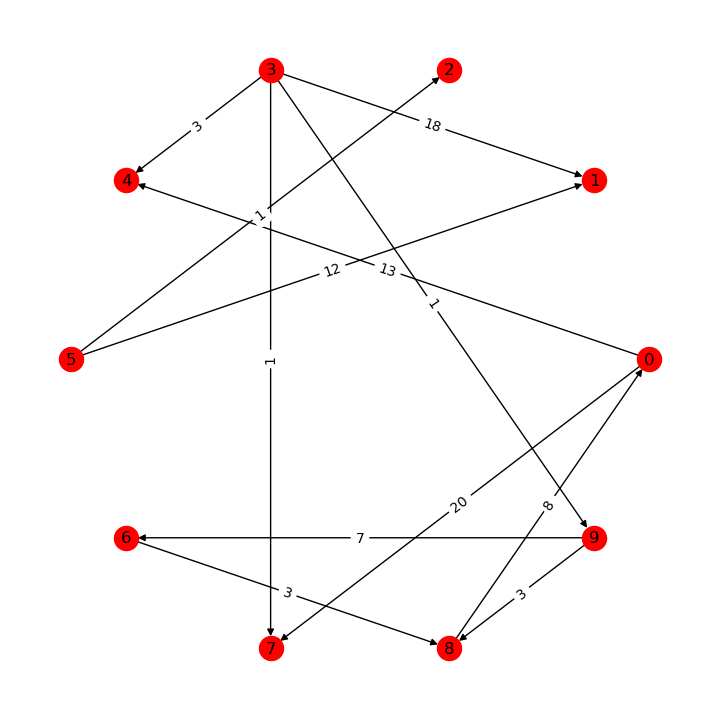

Los nodos sensados fueron:  [7, 5]


Los nodos sensados como contaminados fueron:  [7]
Los nodos sensados como limpios fueron:  [5]




C:\Users\A\AppData\Local\Temp\ipykernel_5948\3840692192.py:127: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sensed_nodes = random.sample(G.nodes(), num_sensors)
C:\Users\A\AppData\Local\Temp\ipykernel_5948\3840692192.py:131: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  new_sensed_node = random.sample(G.nodes(), 1)


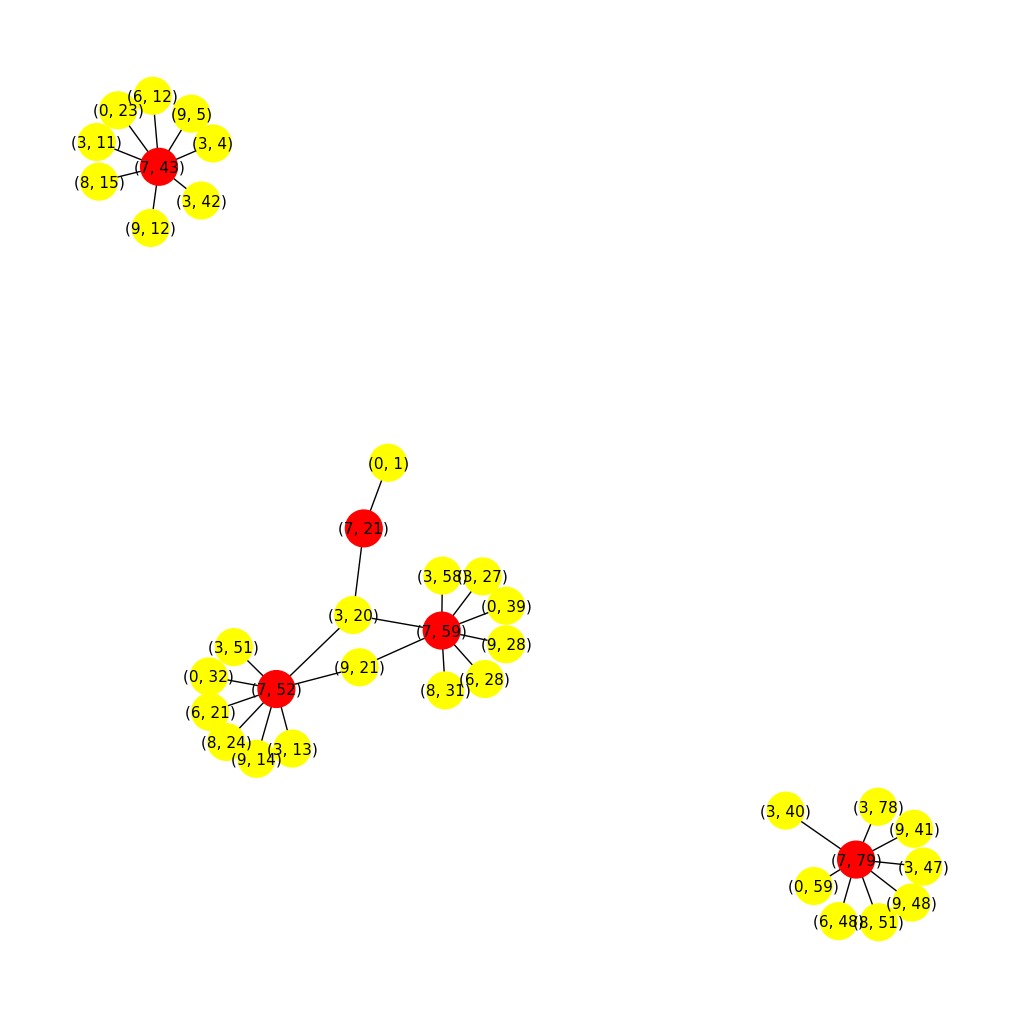

C:\Users\A\AppData\Local\Temp\ipykernel_5948\3840692192.py:356: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sel_nodo = random.sample(origin_nodes_copy,contador)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
Los posibles origenes son:  [[(9, 48), (9, 5), (3, 20)], [(9, 5), (8, 51), (3, 20)], [(9, 5), (6, 48), (3, 20)], [(3, 4), (9, 48), (3, 20)], [(9, 48), (3, 20), (9, 12)], [(9, 5), (0, 59), (3, 20)], [(9, 5), (3, 78), (3, 20)], [(6, 12), (9, 48), (3, 20)], [(9, 48), (8, 15), (3, 20)], [(9, 5), (9, 41), (3, 20)], [(9, 48), (3, 42), (3, 20)], [(9, 48), (0, 23), (3, 20)], [(9, 5), (3, 20), (3, 47)], [(3, 4), (8, 51), (3, 20)], [(3, 78), (3, 20), (9, 12)], [(3, 4), (3, 20), (3, 47)], [(0, 23), (0, 59), (3, 20)], [(3, 42), (3, 78), (3, 20)], [(6, 48), (0, 23), (3, 20)], [(8, 51), (3, 42), (3, 20)], [(8, 51), (3, 11), (3, 20)], [(8, 51), (3, 20), (9, 12)], [(0, 23), (3, 78), (3, 20)], [(8, 15), (0, 59), (3, 20)], [(8, 15), (3, 40), (3, 20)], [(6, 48), (3, 42), (3, 20)], [(6, 12), (0, 59), (3, 20)], [(0, 59), (3, 20), (9, 12)], [(6, 48), (3, 11), (3, 20)], [(0, 59), (3, 11), (3, 20)], [(0, 23), (3, 40), (3, 20)]

In [597]:
########################################################################################

from datetime import datetime
import random
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
from itertools import islice
from networkx.classes.function import path_weight

########################################################################################
start_time = datetime.now()
########################################################################################

# Generate a random directed, connected and acyclic graph
def generate_random_dag(n, m):
    # Create a directed graph object
    G = nx.DiGraph()

    # Generate a list of nodes
    nodes = [i for i in range(n)]

    # Add nodes to the graph
    G.add_nodes_from(nodes)

    # Generate edges until the graph is connected and acyclic
    while not nx.is_directed_acyclic_graph(G) or not nx.is_weakly_connected(G):
        # Randomly select two nodes to connect
        u, v = random.sample(nodes, 2)

        # Add edge if it does not already exist and does not create a cycle
        if not G.has_edge(u, v) and not nx.has_path(G, v, u):
            G.add_edge(u, v)

        # If the graph has too many edges, select those which are still unconnected and connect them
        if G.number_of_edges() > m:
            for i in G.nodes():
                while G.successors(i) == []:
                    s1 = random.sample(nodes, 1)
                    if not G.has_edge(i, s1) and not nx.has_path(G, s1, i):
                        G.add_edge(i, s1)
            
    return G

# Generate graph with between 50 and 150 nodes and between 70 and 200 edges
n = random.randint(10, 15)
m = random.randint(15, 25)
G = generate_random_dag(n, m)

# Print information about the graph
print("Generated graph with {} nodes and {} edges".format(n, m))
print('\n')
print("Is directed acyclic graph: {}".format(nx.is_directed_acyclic_graph(G)))
print('\n')
print("Is connected graph: {}".format(nx.is_weakly_connected(G)))
print('\n')

#############################################################################################

# Select random source nodes and assign contamination emission time patterns
num_sources = random.randint(1, 2)
sources = random.sample(G.nodes(), num_sources)

emission_times = {}
for source in sources:
    n_emissions = random.randint(1, 2)
    times = [0] * 100
    for i in range(n_emissions):
        t = random.randint(0, 99)
        times[t] = 1
    emission_times[source] = times

# Adding contamination time patterns and contamination status patterns to the nodes
for i in G.nodes():
    G.add_node(i , vertido = np.zeros(100,dtype=np.int32), estados = np.zeros(100,dtype=np.int32))
    if i in sources:
        G.nodes[i]['vertido'] = emission_times[i].copy()
        G.nodes[i]['estados'] = emission_times[i].copy()
            
# Assign random weights between 1 and 20 to the edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 20)


print("Number of nodes:", n)
print('\n')
print("Number of edges:", m)
print('\n')
print("Contamination sources:", sources)
print('\n')
print("Contamination emission time patterns:")
print('\n')
for source, times in emission_times.items():
    print("Node", source, ":", times)
    
# Printing the graph
pos = nx.circular_layout(G)
plt.figure(figsize=(7,7))
nx.draw(G,with_labels=True,node_color='red', pos=pos)  
edge_labels = nx.get_edge_attributes(G,'weight')
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} 
nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='black')
plt.show() 

############################################################################################
# Simulating flow of contamination on the graph (Direct Problem)
############################################################################################

pesos = []
for i in sources:
    for k in nx.algorithms.descendants(G, i):
        caminos = list(nx.all_simple_paths(G, i, k))
        for camino in caminos:
            peso = path_weight(G, camino, weight="weight")
            pesos.append(peso)
            for time, state in enumerate(G.nodes[i]['vertido']):
                if state == 1 and time + peso < 100:
                    G.nodes[k]['estados'][time + peso] = 1

###########################################################################################
# Inference (Inverse Problem)
###########################################################################################

# Selecting nodes that will act as sensors:
num_sensors = random.randint(1, 3)
sensed_nodes = random.sample(G.nodes(), num_sensors) 
for ind, i in enumerate(sensed_nodes):
    if i in sources:
        sensed_nodes.pop(ind)
        new_sensed_node = random.sample(G.nodes(), 1)
        sensed_nodes.append(new_sensed_node[0])

sensed_nodes_clean = []
sensed_nodes_cont = []
t_max = 100
cont_pat = []
         
# esto es para diferenciar entre nodos medidos como contaminados o limpios:
  
print('Los nodos sensados fueron: ', sensed_nodes)
print('\n')

for i in sensed_nodes:
    if 1 in G.nodes[i]['estados']:
        sensed_nodes_cont.append(i)
    else:
        sensed_nodes_clean.append(i)

for i in sensed_nodes_cont:
    cont_pat.append(G.nodes[i]['estados'])

print('Los nodos sensados como contaminados fueron: ', sensed_nodes_cont)    
print('Los nodos sensados como limpios fueron: ', sensed_nodes_clean)
print('\n')

# If no measured node was seen as contaminated and therefore no contamination was registered
if len(sensed_nodes_cont) == 0:
    print('NO SE REGISTRO CONTAMINACION')
    
    
# esto es para remover los nodos medidos contaminados que son predecesores directos de otros nodos medidos contaminados:          
k_nodes = sensed_nodes_cont.copy()
u = []
l = []
exp_nodes = []
for i in range(len(k_nodes)):
    for t in range(len(k_nodes)): 
        if i != t:
            p = list(nx.all_simple_paths(G,k_nodes[i], k_nodes[t]))  
            for k in p:
                sum_t = 0
                for w in range(len(k)-1):  
                    sum_t = sum_t + G[k[w]][k[w+1]]['weight']
                      
                for h, num in enumerate(G.nodes[k[0]]['estados']):
                    if num == 1:
                        u.append(h)
                for a, zed in enumerate(G.nodes[k[-1]]['estados']):
                    if zed == 1:
                        l.append(a)

                for r in range(len(l)):
                    for y in range(len(u)):
                        if l[r] - u[y] == sum_t:
                            if k[-1] not in exp_nodes:
                                exp_nodes.append(k[-1])
                                
                l.clear()
                u.clear()

for i in exp_nodes:
    f = k_nodes.index(i)
    cont_pat.pop(f)
    k_nodes.remove(i)

#######################################################################################################################
# aqui empiezo a crear el nuevo grafo de las conexiones directas:

# Times in which a measured node showed contamination:
cont_times = []
full_paths = []

for j in range(len(cont_pat)):
    for i, state in enumerate(cont_pat[j]):
        if state == 1:
            cont_times.append(tuple([k_nodes[j],i]))


neg_inf_imp_source_nodes = []
          
for t in sensed_nodes_clean:
    for i in G.nodes():  
        if t in nx.algorithms.descendants(G, i) and i not in neg_inf_imp_source_nodes:            
            neg_inf_imp_source_nodes.append(i)

neg_inf_pos_source_nodes = []

for i in G.nodes():
        if i not in neg_inf_imp_source_nodes and i not in sensed_nodes_clean:
            neg_inf_pos_source_nodes.append(i)
            
# funcion para encontrar las posibles conexiones directas en base a los pesos totales posibles:

def path_finder(source, target):
    dsa = list(nx.all_simple_paths(G, source, target))
    
    c_weights = []

    for i in dsa:
        sum_w = 0
        for t in range(len(i)-1):
            sum_w += G[i[t]][i[t+1]]['weight']
        c_weights.append(sum_w)   
        
    path_pos = []
    path_weight = []
    
    # recurrencia para crear las listas de nodos, enlaces y caminos del nuevo grafo:
        
    for z in range(100):
            for i, weight in enumerate(c_weights):
                if (target, weight + z) in cont_times:
                    #path_pos.append(i)
                    path_weight.append(weight)
                    full_paths.append([dsa[i],weight + z,z])
   

 # funcion para caminar sobre todo el grafo usando el path_finder:
def create_Gf():
    for i in k_nodes:
        for t in neg_inf_pos_source_nodes:
            path_finder(t,i)
create_Gf()

##########################################################################################

# Se crea el grafo bipartido

o_nodes = []
for i in full_paths:
    if (i[0][0],i[2]) not in o_nodes: 
        o_nodes.append((i[0][0],i[2]))
            
Gf = nx.Graph()
Gf.add_nodes_from(cont_times, bipartite=1)
Gf.add_nodes_from(o_nodes, bipartite=0)

for j in full_paths:
    Gf.add_edge((j[0][0],j[2]),(j[0][-1],j[1]))
    
pos = nx.spring_layout(Gf,seed = 1)

color_map = []
for node in Gf:
    if node in cont_times:
        color_map.append('red')
    else: 
        color_map.append('yellow') 
                 
plt.figure(figsize=(10,10)) 
nx.draw(Gf,with_labels=True,node_color=color_map, edge_cmap=plt.cm.Blues,pos=pos, 
        node_size=700,font_size=11)

plt.show()
       
# Se convierte el grafo bipartido en uno direccional

Gs = nx.DiGraph(Gf)

########################################################################

# Problema de optimizacion con ILP

import pulp

# Create the ILP problem
problem = pulp.LpProblem('Smallest set of origin nodes', pulp.LpMinimize)

# Create the decision variables
origin_nodes = set(n for n, d in Gs.nodes(data=True) if d['bipartite']==0)
x = pulp.LpVariable.dicts('x', origin_nodes, lowBound=0, upBound=1, cat=pulp.LpInteger)

# End nodes
end_nodes = set(n for n, d in Gs.nodes(data=True) if d['bipartite']==1)

# Define the objective function

problem += pulp.lpSum(x)

# Define the constraints
for j in Gs.nodes():
    if Gs.nodes[j]['bipartite'] == 1:  # end node
        problem += pulp.lpSum(x[i] for i in Gs.predecessors(j)) >= 1

solutions = []
sel_nodos = []
or_nod = set(origin_nodes)
contador = 1
origin_nodes_copy = origin_nodes.copy()
iterator = 0
op_sol_len = 0

while True and contador <= len(origin_nodes):
    # Solve the ILP
    if len(sensed_nodes_cont) == 0:
        break
    status = problem.solve()
    
    if iterator == 0:
        op_sol_len = len([i for i in origin_nodes if x[i].value() == 1])
    
    # Check if the problem is infeasible or unbounded
    if status != 1:
        print('status not optimal')
        break
    if [i for i in origin_nodes if x[i].value() == 1] not in solutions and len([i for i in origin_nodes if x[i].value() == 1]) == op_sol_len:
        solutions.append([i for i in origin_nodes if x[i].value() == 1])
        #print(solutions)
    
    iterator = iterator + 1
    
    # Multiplicidad:
    X=[]
    Y=[]
    
    if all(x in sel_nodos for x in origin_nodes):
        print(contador)
        contador = contador + 1
        sel_nodos.clear()
        
    if len(origin_nodes_copy) == 0 : 
        origin_nodes_copy = origin_nodes.copy()
    
    if len(origin_nodes_copy)> contador:    
        sel_nodo = random.sample(origin_nodes_copy,contador)
    else:
        for i in origin_nodes_copy:
            sel_nodo.append(i)
    #print(sel_nodo)
    
    for i in sel_nodo: 
        if i in origin_nodes_copy:
            origin_nodes_copy.remove(i)
        if i not in sel_nodos:
            sel_nodos.append(i)   
    #print(sel_nodos)
    
    for i in origin_nodes:
        if i in sel_nodo:
            Y.append(1.001*x[i])
        else:
            X.append(x[i])
            
    problem += pulp.lpSum(X+Y)  
    
    
    #if [i for i in origin_nodes if x[i].value() == 1] in solutions:
        #print([i for i in origin_nodes if x[i].value() == 1], ' repeated solution')
        #break

print('Los posibles origenes son: ', solutions)  
print('\n')
s_zero = []
par_sol = []


for i in solutions:
    true = 1
    for j in i:
        s_zero.append(j[0])
    for k in s_zero:
        if k != s_zero[0]:
            true = 0
    if true == 1:
        par_sol.append(i)
    s_zero.clear()
    
print('Soluciones con parsimonia espacial: ', par_sol)
print('\n')
    
#############################################################################################

# Time required to run the program
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [587]:
len(origin_nodes)

15

In [598]:
len(solutions)

44

48